# Dataset Overview
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
datasets = {
    'tanzil': '../../dataset/tanzil.csv',
    'Wholesale': '../../dataset/CLUSTERING ALGORITHMS (UNLABELLED DATA)/Wholesale customers data.csv',
    'City Lifestyle': '../../dataset/DENSITY-BASED LEARNING/city_lifestyle_dataset.csv',
    'Breast Cancer': '../../dataset/SEMI_SUPERVISED_LEARNING/breast_Cancer.csv',
    'Adult': '../../dataset/ENSEMBLE_LEARNING/adult.csv',
    'MNIST Train': '../../dataset/MLP/mnist_train.csv',
    'MNIST Test': '../../dataset/MLP/mnist_test.csv',
    'Air Passengers': '../../dataset/RNN/AirPassengers.csv'
}

dataset_info = {}

for name, path in datasets.items():
    if os.path.exists(path):
        df = pd.read_csv(path)
        dataset_info[name] = df
        print(f'\n{name}:')
        print(f'  Shape: {df.shape}')
        print(f'  Columns: {df.columns.tolist()}')
    else:
        print(f'{name}: Not found at {path}')


tanzil:
  Shape: (10147, 11)
  Columns: ['Student_ID', 'Age', 'Gender', 'Department', 'CGPA', 'Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 'Stress_Level', 'Depression']

Wholesale:
  Shape: (440, 8)
  Columns: ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

City Lifestyle:
  Shape: (300, 10)
  Columns: ['city_name', 'country', 'population_density', 'avg_income', 'internet_penetration', 'avg_rent', 'air_quality_index', 'public_transport_score', 'happiness_score', 'green_space_ratio']

Breast Cancer:
  Shape: (569, 33)
  Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', '

In [3]:
for name, df in dataset_info.items():
    print(f'\n{"="*60}')
    print(f'{name} - Detailed Overview')
    print(f'{"="*60}')
    print(f'Shape: {df.shape}')
    print(f'Data types:\n{df.dtypes}')
    print(f'\nMissing values:\n{df.isnull().sum()}')
    print(f'\nBasic statistics:')
    numeric_df = df.select_dtypes(include=[np.number])
    if len(numeric_df.columns) > 0:
        print(numeric_df.describe().round(2))
    else:
        print('No numeric columns')


tanzil - Detailed Overview
Shape: (10147, 11)
Data types:
Student_ID              int64
Age                     int64
Gender                    str
Department                str
CGPA                  float64
Sleep_Duration        float64
Study_Hours           float64
Social_Media_Hours    float64
Physical_Activity       int64
Stress_Level            int64
Depression               bool
dtype: object

Missing values:
Student_ID            0
Age                   0
Gender                0
Department            0
CGPA                  0
Sleep_Duration        0
Study_Hours           0
Social_Media_Hours    0
Physical_Activity     0
Stress_Level          0
Depression            0
dtype: int64

Basic statistics:
       Student_ID       Age      CGPA  Sleep_Duration  Study_Hours  \
count    10147.00  10147.00  10147.00        10147.00     10147.00   
mean      6074.00     21.03      2.90            6.98         4.52   
std       2929.33      2.01      0.53            1.50         1.99   
min 

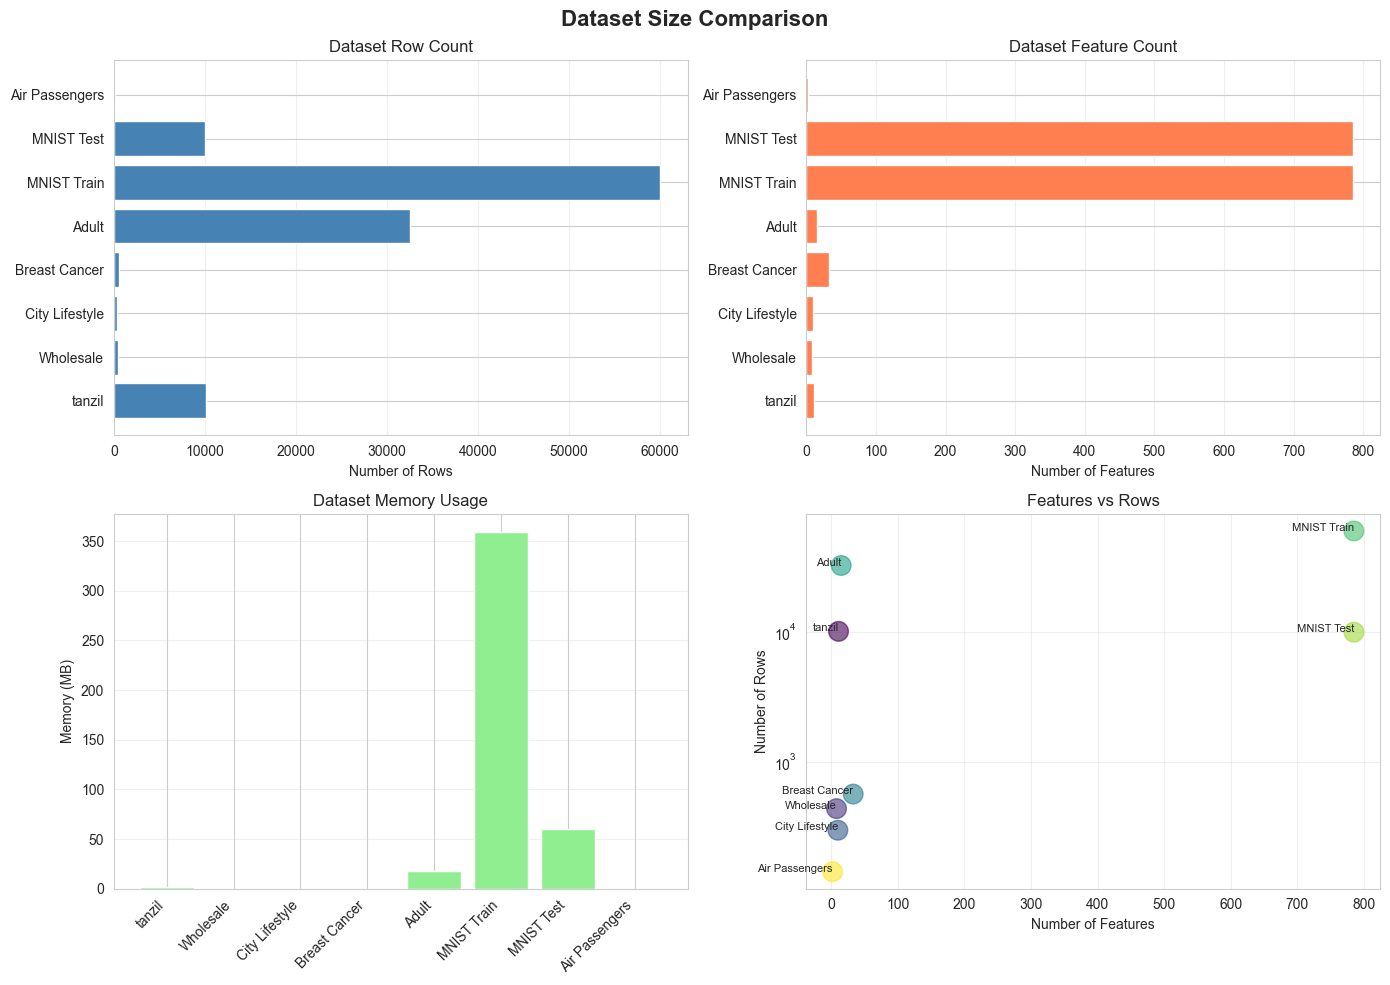

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Dataset Size Comparison', fontsize=16, fontweight='bold')

names = list(dataset_info.keys())
sizes = [dataset_info[name].shape[0] for name in names]
features = [dataset_info[name].shape[1] for name in names]

axes[0, 0].barh(names, sizes, color='steelblue')
axes[0, 0].set_xlabel('Number of Rows')
axes[0, 0].set_title('Dataset Row Count')
axes[0, 0].grid(axis='x', alpha=0.3)

axes[0, 1].barh(names, features, color='coral')
axes[0, 1].set_xlabel('Number of Features')
axes[0, 1].set_title('Dataset Feature Count')
axes[0, 1].grid(axis='x', alpha=0.3)

total_sizes = [dataset_info[name].memory_usage(deep=True).sum() / (1024**2) for name in names]
axes[1, 0].bar(range(len(names)), total_sizes, color='lightgreen')
axes[1, 0].set_xticks(range(len(names)))
axes[1, 0].set_xticklabels(names, rotation=45, ha='right')
axes[1, 0].set_ylabel('Memory (MB)')
axes[1, 0].set_title('Dataset Memory Usage')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].scatter(features, sizes, s=200, alpha=0.6, c=range(len(names)), cmap='viridis')
for i, name in enumerate(names):
    axes[1, 1].annotate(name, (features[i], sizes[i]), fontsize=8, ha='right')
axes[1, 1].set_xlabel('Number of Features')
axes[1, 1].set_ylabel('Number of Rows')
axes[1, 1].set_title('Features vs Rows')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

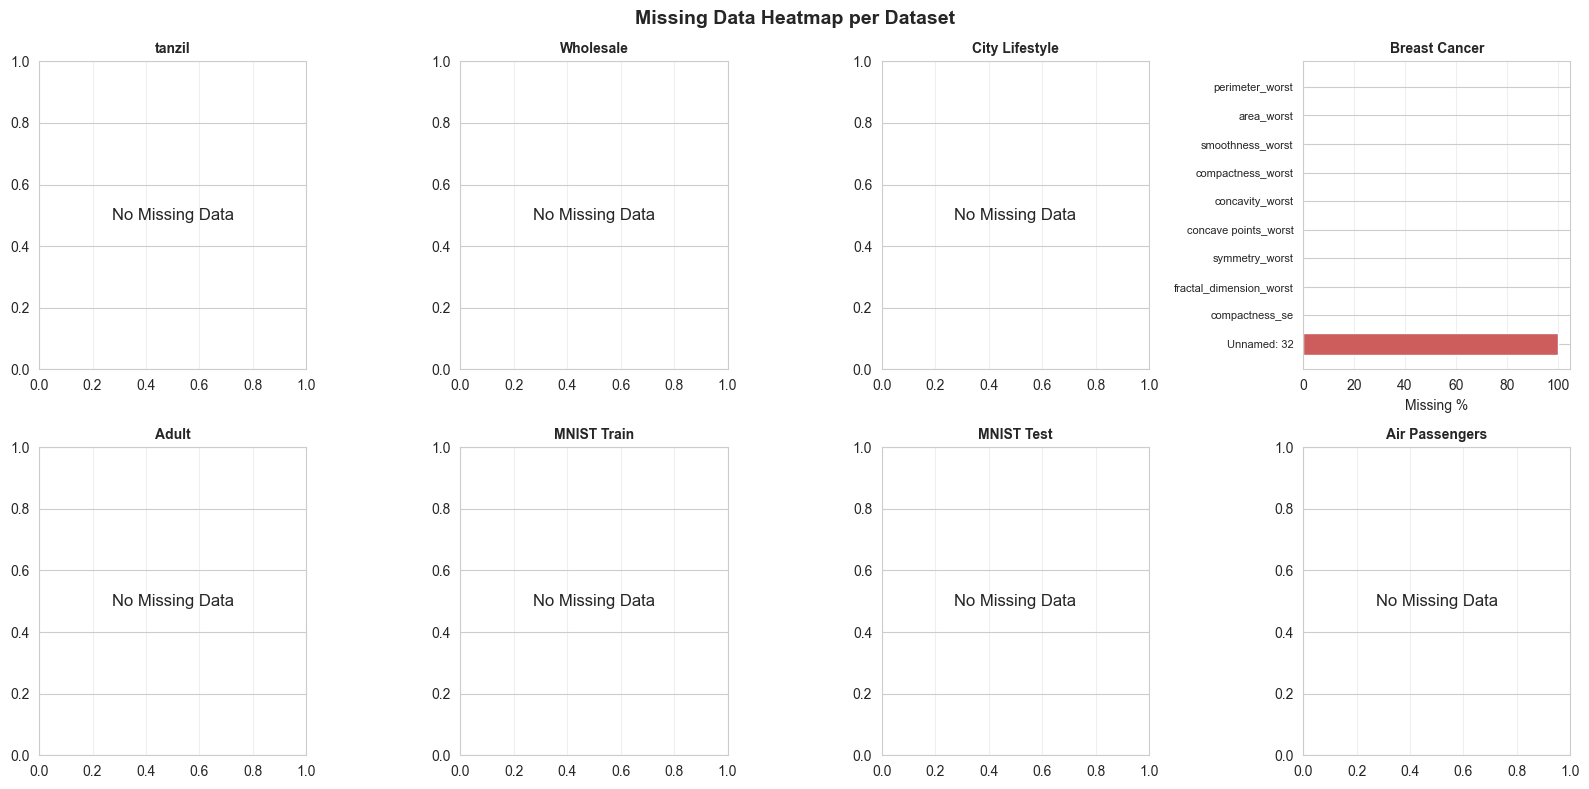

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Missing Data Heatmap per Dataset', fontsize=14, fontweight='bold')
axes = axes.flatten()

for idx, (name, df) in enumerate(dataset_info.items()):
    if idx < len(axes):
        missing = df.isnull().sum()
        if missing.sum() > 0:
            missing_pct = (missing / len(df) * 100).sort_values(ascending=False).head(10)
            axes[idx].barh(range(len(missing_pct)), missing_pct.values, color='indianred')
            axes[idx].set_yticks(range(len(missing_pct)))
            axes[idx].set_yticklabels(missing_pct.index, fontsize=8)
            axes[idx].set_xlabel('Missing %')
        else:
            axes[idx].text(0.5, 0.5, 'No Missing Data', ha='center', va='center', fontsize=12)
        axes[idx].set_title(name, fontsize=10, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

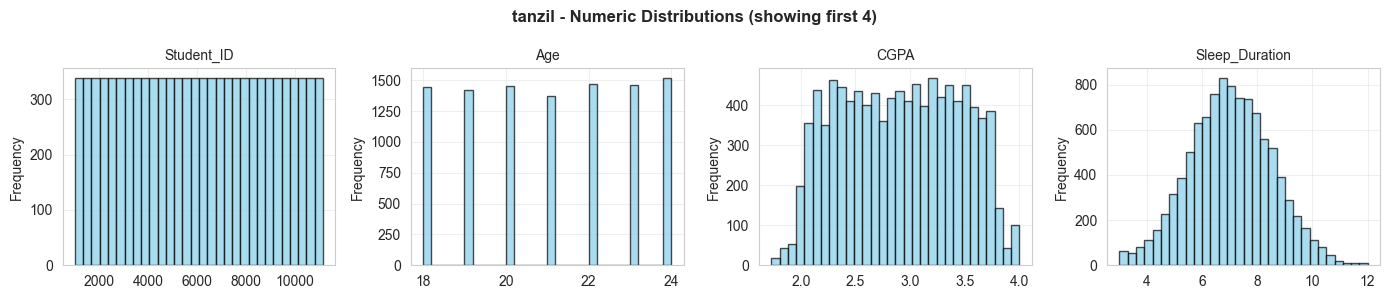

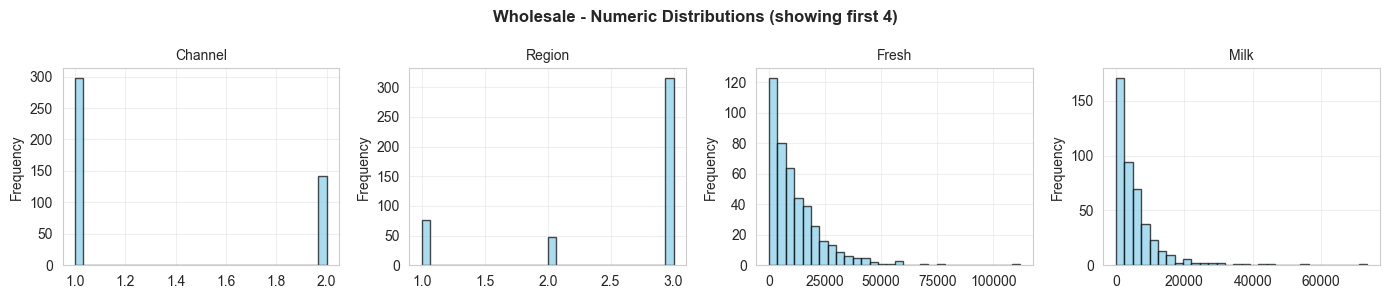

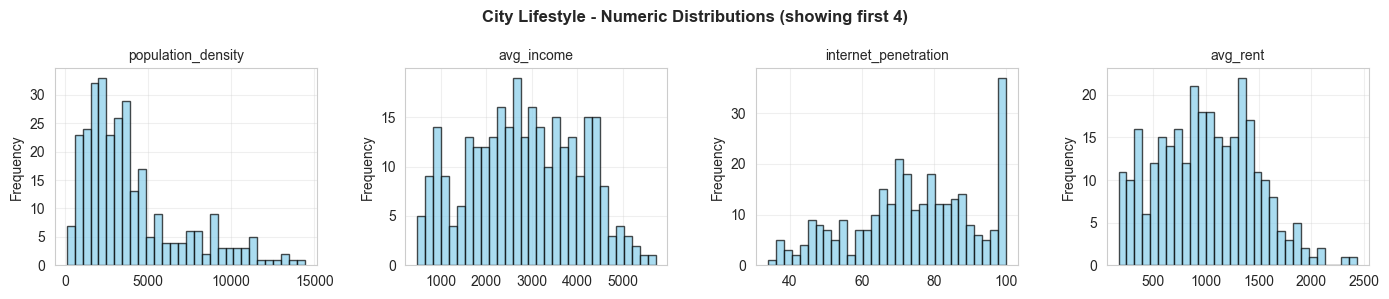

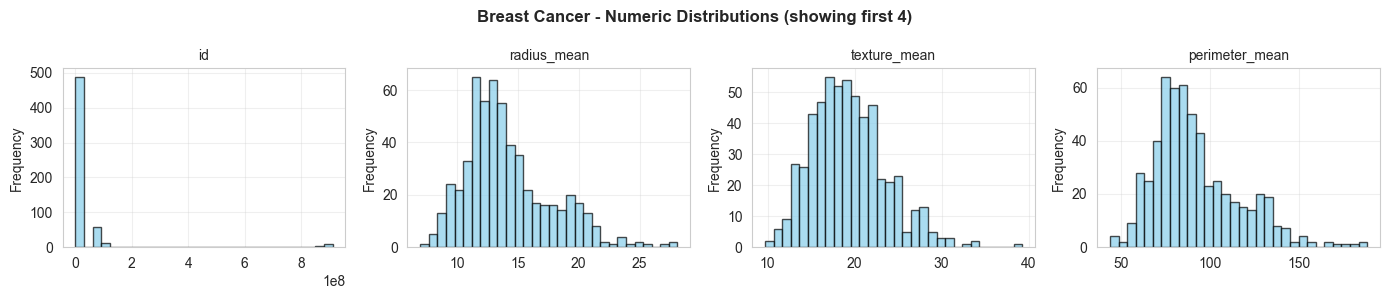

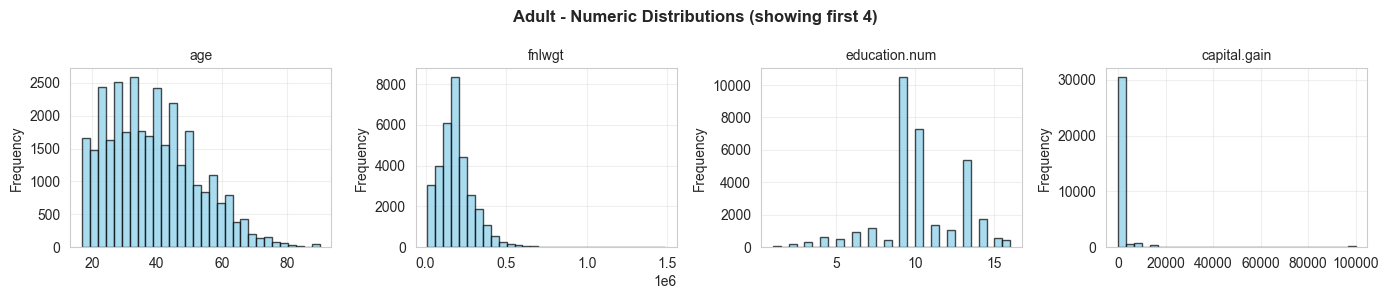

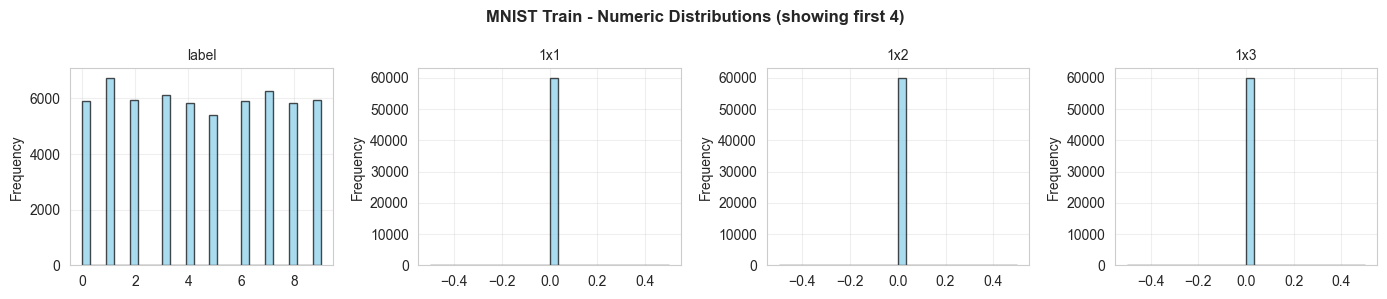

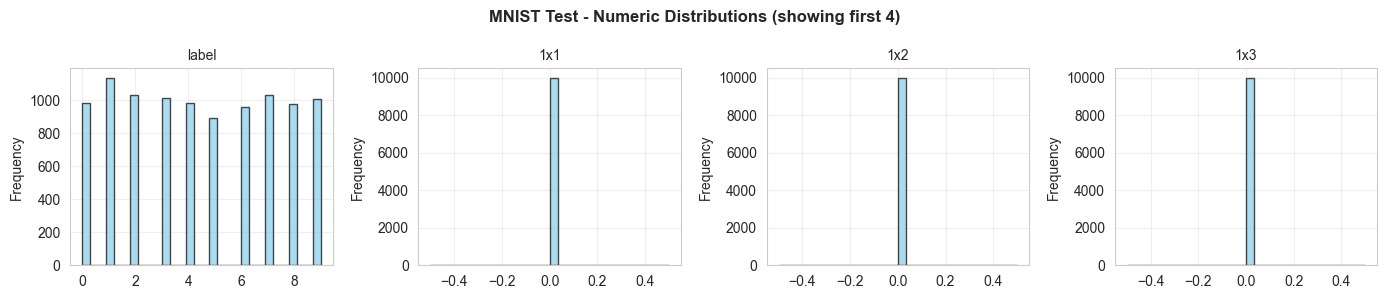

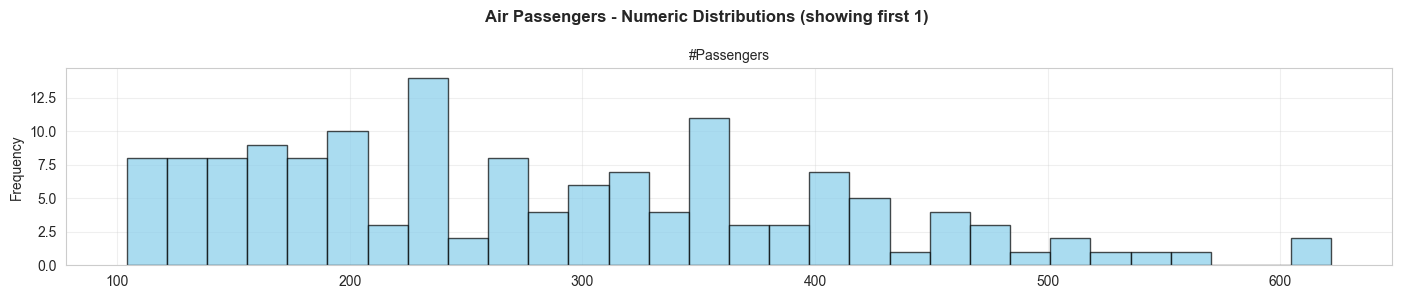

In [6]:
for name, df in dataset_info.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_cols) > 0:
        n_cols = min(4, len(numeric_cols))
        fig, axes = plt.subplots(1, n_cols, figsize=(14, 3))
        
        if n_cols == 1:
            axes = [axes]
        
        for idx, col in enumerate(numeric_cols[:n_cols]):
            axes[idx].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'{col}', fontsize=10)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(alpha=0.3)
        
        fig.suptitle(f'{name} - Numeric Distributions (showing first {n_cols})', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()